published in [Kaggle](https://www.kaggle.com/nowke9/statistics-2-distributions)

# Introduction

A distribution of data is a representation (or function) showing all possible values (or intervals) and how often those values occur.

For **categorical data**, we'll often see percentage or exact number for each of the category.<br>
For **numerical data**, we'll see the data split into appropriate sized buckets ordered from smallest to largest

When a distribution is plotted into a graph, we can observe different shapes of the curve. Based on the shape and other attributes, there exists many types of distributions. A few statistical distributions are,
* Bernoulli Distribution
* Binomial Distribution
* Cumulative frequency distribution
* Bimodal distribution
* Gaussian distribution (Normal distribution)
* Uniform distribution

Let's setup our dataset,

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import stats

matches    = pd.read_csv('../input/matches.csv')
deliveries = pd.read_csv('../input/deliveries.csv')

# Cumulative relative frequency graph

Let's take `win_by_wickets` dataset and plot a frequency distribution graph.

X-axis - Win by wickets (value from 1 to 10), Y-axis - Number of instances (or frequency) of win-by-wicket margin

1      3
2      6
3     18
4     41
5     71
6     85
7     80
8     54
9     37
10    11
Name: win_by_wickets, dtype: int64


Text(0, 0.5, 'Frequency')

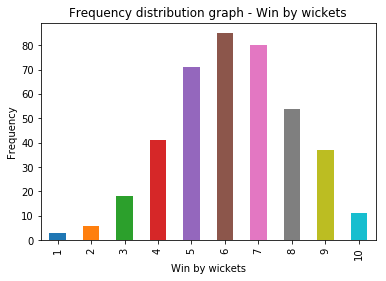

In [2]:
win_by_wickets_data = matches[matches.win_by_wickets > 0].win_by_wickets
win_by_wickets_freq = win_by_wickets_data.value_counts(sort=False)
print(win_by_wickets_freq)
plt = win_by_wickets_freq.plot.bar()
plt.set_title("Frequency distribution graph - Win by wickets")
plt.set_xlabel("Win by wickets")
plt.set_ylabel("Frequency")

Now, let's plot **Relative frequency distribution graph** for the same data. Here in **Y-axis**, instead of showing the frequency, we show the **percentage** of the value. We can use `normalize = True` argument for `pandas.Series.value_counts` method

1     0.007389
2     0.014778
3     0.044335
4     0.100985
5     0.174877
6     0.209360
7     0.197044
8     0.133005
9     0.091133
10    0.027094
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Relative frequency (%)')

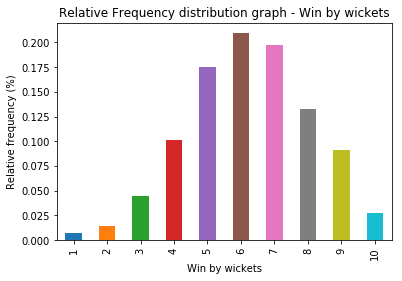

In [3]:
win_by_wickets_rel_freq = win_by_wickets_data.value_counts(sort = False, normalize = True)
print(win_by_wickets_rel_freq)
plt = win_by_wickets_rel_freq.plot.bar()
plt.set_title("Relative Frequency distribution graph - Win by wickets")
plt.set_xlabel("Win by wickets")
plt.set_ylabel("Relative frequency (%)")

From here, we can plot the **cumulative relative frequency graph** using `pandas.Series.cumsum` .

1     0.007389
2     0.022167
3     0.066502
4     0.167488
5     0.342365
6     0.551724
7     0.748768
8     0.881773
9     0.972906
10    1.000000
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Cumulative relative frequency (%)')

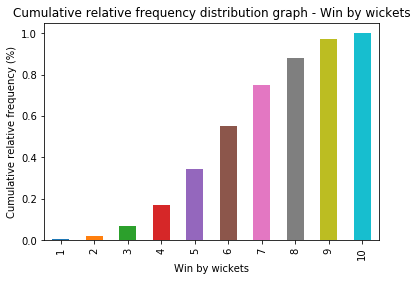

In [4]:
win_by_wickets_cumulative_freq = win_by_wickets_data.value_counts(sort = False, normalize = True).cumsum()
print(win_by_wickets_cumulative_freq)
plt = win_by_wickets_cumulative_freq.plot.bar()
plt.set_title("Cumulative relative frequency distribution graph - Win by wickets")
plt.set_xlabel("Win by wickets")
plt.set_ylabel("Cumulative relative frequency (%)")

What's the relevance of this representation?

Let's try to answer this &rarr; **What is the probability of winning a match by 6 wickets or less?**. 

Of course we can calculate that using the data. But let's try to figure out from the graph. Draw a line from the top of **"6"** to the Y-axis. We'll draw **Line graph** instead of Bar graph.

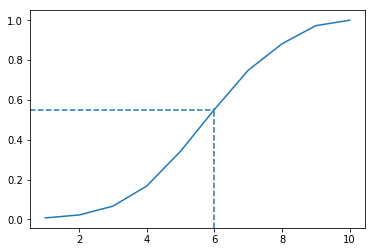

In [5]:
plt = win_by_wickets_cumulative_freq.plot.line()
plt.axhline(y = win_by_wickets_cumulative_freq[6], xmax = 5.5/10, linestyle='dashed')
plt.axvline(x = 6, ymax = win_by_wickets_cumulative_freq[6], linestyle='dashed')

We can roughly approximate this value to be around 0.54. 

Thus, using cumulative relative frequency graph, the **probability of winning a match by 6 wickets or less is approximately 54%.**

We can also calculate the **percentile** of a value using the above graph. For example, if a team wins by a margin of **4** wickets, the **percentile** of this match is around **16%**

# Normal distribution

**Normal distribution** is a continuous probability distribution that describes many natural datasets. It is also known as **bell curve** or **Gaussian distribution**. We see many natural examples that are closer to a normal distribution.

* Heights of people
* Shoe sizes
* Lap duration in a car race

In a perfect normal distribution, we can see 50% symmetry about the center. Also, the center is - **mean** = **mode** = **median**.

![Normal distribution - symmetry](https://raw.githubusercontent.com/nowke/nowke.github.io/gh-pages/src/pages/stats/images/normal-distribution-symmetry.png)

## Normal distribution and variance

If the variance of the dataset is high, the curve tends to look flat. If variance is low, curve is more steeper.

![Nomral distribution - variance](https://raw.githubusercontent.com/nowke/nowke.github.io/gh-pages/src/pages/stats/images/normal-distribution-variance.png)

Let's plot `win_by_wickets` data and watch the curve.

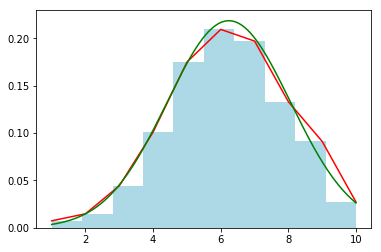

In [6]:
# Get mean (mu) and std (sigma)
win_by_wickets_mean, win_by_wickets_std = win_by_wickets_data.mean(), win_by_wickets_data.std()

# Plot histogram (normalized) - LIGHT-BLUE
win_by_wickets_data.hist(color='lightblue', weights = np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count())

# Plot line graph - RED
win_by_wickets_data.value_counts(sort=False, normalize=True).plot.line(color='red')

# Normal distribution for random points between 1 to 10 with mean, std.
random_data = np.arange(1, 10, 0.001)
pyplot.plot(random_data, stats.norm.pdf(random_data, win_by_wickets_mean, win_by_wickets_std), color='green')

## Plotting the probability density function (PDF)

A Probability distribution function (PDF) is a function associated with continuous random variable which desribes the relative probability of the random variable at a given value.

The probability density function of the normal distribution for a given point (x), mean ($\mu$) and standard deviation ($\sigma$)  is given by,

$$
\begin{align}
f(x, \mu, \sigma) = {1 \over \sqrt{2\pi\sigma^2}} \cdot e^{-{(x - \mu)^2} \over 2\sigma^2}
\end{align}
$$

Let's plot a PDF for some random values (Source: [numpy.random.normal](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html))

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


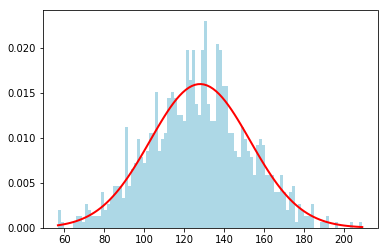

In [7]:
mu, sigma = 128, 25 # From the above example
highest_scores = np.random.normal(mu, sigma, 1000) # Random 1000 values

count, bins, _ = pyplot.hist(highest_scores, 100, normed = True, color='lightblue') # plot 100 points
pyplot.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    linewidth = 2, color = 'r') # Plot the PDF

# Z-Score

A Z-score measures how many standard deviations above or below the mean a data point is. It is calculated as,

$$
\begin{align}
z = {x - \mu \over \sigma}
\end{align}
$$

* Positive Z-score &rarr; Data point is above the mean
* Negative Z-score &rarr; Data point is below the mean
* Close to zero &rarr; Data point is close to the mean

**Example**: If a team wins by a margin of 35 runs, what's the z-score? Let's calculate

In [8]:
win_by_runs_data = matches[matches.win_by_runs > 0].win_by_runs
win_by_runs_mean, win_by_runs_std = win_by_runs_data.mean(), win_by_runs_data.std()
z_score_35 = (35 - win_by_runs_mean) / win_by_runs_std
print(f'Z-score of 35 is {z_score_35:.2f}')

Z-score of 35 is 0.19


We can convert from z-score to percentile using a [Z-table](http://www.z-table.com/) or `scipy.stats.norm.cdf` function.

![Z-score-curve](https://raw.githubusercontent.com/nowke/nowke.github.io/gh-pages/src/pages/stats/images/z-score-curve.png)

In [9]:
z_score = stats.norm.cdf(0.19)
print(f'z-score of 0.19 = {z_score * 100:.2f} percentile')

z-score of 0.19 = 57.53 percentile


Probability distribution function in terms of z-score (z) given by,

$$
\begin{align}
f(x, \sigma, z) = {1 \over \sqrt{2\pi\sigma^2e^{z^2}}}
\end{align}
$$

# Empirical rule (68–95–99.7 rule)

**Empirical rule** also called **68-95-99.7** or **three sigma rule** gives an approximate of values within 1,2 or 3 standard deviations from the mean. The following diagrams represents the value distribution from the mean in a normal distribution.

![Empirical rule](https://raw.githubusercontent.com/nowke/nowke.github.io/gh-pages/src/pages/stats/images/normal-distribution-empirical.png)
![Normal distribution](https://raw.githubusercontent.com/nowke/nowke.github.io/gh-pages/src/pages/stats/images/normal-distribution.png)

# Binomial distribution

## Binomial experiment

A Binomial experiment has the following properties.

* Consists of fixed number of trials (n)
* Trials are independent of each other
* Each trial can be either success or failure
* Probability of success (P) on each trial remains the same

***Example:*** Number of heads in after flipping a coin 10 times

* The experiment is conducted for fixed number of trials - 10
* Probability of getting head in one trial does not affect the other
* Probability of getting head in any trial remains same - 0.5 (in a non-biased coin)

## Binomial variable

A **binomial variable** is the number of successes (x) out of all the trials (n).

What is the probability of getting 5 heads after flipping a coin 10 times? Here $x = 5$ is a binomial variable.

## Binomial distribution

The probability distribution of a binomial variable is called **Binomial distribution**.

Let's take the problem statement of flipping a coin - Probability of getting 5 heads after 10 flips? P(X = 5) can be calculated as

$$
\begin{align}
P(X = 5) = No.\,of\,outcomes\,we\,want\,\times Probability\,of\,each\,outcome
\end{align}
$$

For 10 flips, we have a total of $2^{10} =1024$ outcomes. Hence,

$$
\begin{align}
Probability\,of\,each\,outcome={1 \over 1024}
\end{align}
$$

No. of outcomes where exactly 5 heads occur out of 10 flips = $^{10}C_5 = 252$

$$
\begin{align}
P(X = 5) = 252 \times {1 \over 1024} \approx 24.6 \%
\end{align}
$$

### Deriving General Binomial Probability equation

Let's take the example of a biased coin instead of a fair coin with **60%** chance of heads and **40%** chance of tails.

What is the probability of getting 2 heads out of 3 tosses?

$p = 0.6$ (Probability of getting heads)

$x = 2$ (no. of success i.e. heads)

$n = 3$ (no. of trials)

No. of outcomes we want = $^{n}C_x = ^{3}C_2 = 3$ (HHT, HTH, THH) 

To calculate probability of each outcome, let's take one outcome- HHT

* Probability of getting **H** in trial 1 = 0.6
* Probability of getting **H** in trial 2 = 0.6
* Probability of getting **T** in trial 3 = 0.4

Hence, probability of getting HHT = $0.6\times0.6\times0.4 = 0.144$

i.e. $(0.6)^2 \times (0.4)^1 = (0.6)^2 \times (1-0.6)^(2-1) = p^x \times (1-p)^{n-x}$

Finally,

Probability of getting 2 heads out of 3 = $3 \times 0.144 = 0.432$

Putting it together,

$$
\begin{align}
No.\,of\,outcomes\,= ^{n}C_x
\end{align}
$$

$$
\begin{align}
Probability\,of\,each\,outcome\,= p^x \times (1-p)^{(n-x)}
\end{align}
$$

$$
\begin{align}
P(x\,\,of\,\,n) = ^{n}C_x\,\,p^x\,(1-p)^{(n-x)}
\end{align}
$$

Hence, the **general binomial probability equation** is,

$$
\begin{align}
P(x\,\,of\,\,n) = {n! \over x!(n-x)!}\,p^x\,(1-p)^{(n-x)}
\end{align}
$$

Also,

$$
\begin{align}
Expected\,Value: E[X] = n \cdot p
\end{align}
$$

$$
\begin{align}
Variance: \sigma^2 = n \cdot p \cdot (1 - p)
\end{align}
$$

$$
\begin{align}
Standard\,deviation: \sigma = \sqrt{n \cdot p \cdot (1 - p)}
\end{align}
$$

## Plotting Binomial Distribution

Let $X$ be a random variable = No. of heads from flipping a coin 5 times

$$
\begin{align}
P(X = 0) = {5! \over 0!(5-0)!}\,0.5^0\,(1-{1 \over 2})^{(5-0)} = {1 \over 32}
\end{align}
$$

$$
\begin{align}
P(X = 1) = {5 \over 32},
P(X = 2) = {10 \over 32},
P(X = 3) = {10 \over 32},
P(X = 4) = {5 \over 32},
P(X = 5) = {1 \over 32}
\end{align}
$$

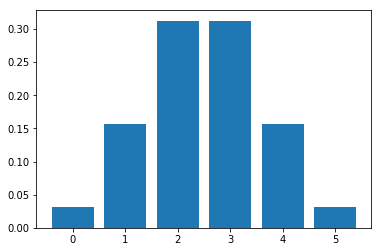

In [10]:
def compute_binomial_probability(x, n, p):
    """Returns the probability of getting `x` success outcomes in `n` trials,
    probability of getting success being `p`

    Arguments:

    x - number of trials of the event
    n - number of trials
    p - probability of the event

    """
    outcomes = math.factorial(n) / (math.factorial(x) * math.factorial(n - x))
    probability_of_each_outcome = p ** x * (1 - p) ** (n - x)
    return outcomes * probability_of_each_outcome

def plot_binomial_distribution_graph(n, p):
    """Plots Binomial distribution graph of an event with `n` trials,
    probability of getting success of the event being `p` for values `0` to `n`

    Arguments:

    n - number of trials
    p - probability of the event

    """
    probabilities = list(map(lambda x: compute_binomial_probability(x, n, p), range(0, n+1)))
    pyplot.bar(list(range(0, n+1)), probabilities)

plot_binomial_distribution_graph(5, 0.5)

Let's plot the distribution for flipping a coin 10 times.

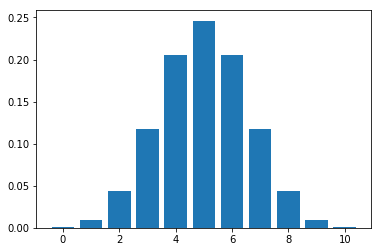

In [11]:
plot_binomial_distribution_graph(10, 0.5)

As we can observe, with more trials, the plot tends to look like **Normal distribution**

Plotting the graph for a biased coin - $P(head) = 0.7, P(tail) = 0.3$

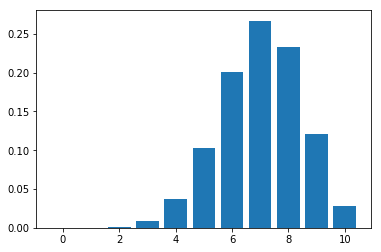

In [12]:
plot_binomial_distribution_graph(10, 0.7)

# Bernoulli distribution

Bernoulli distribution is a **discrete probability distribution** of a random variable which has only two outcomes ("success" or a "failure"). It is named after Swiss mathematician [**Jacon Bernoulli**](https://en.wikipedia.org/wiki/Jacob_Bernoulli). It is a special case of Binomial distribution for n = 1.

For example, probability (**p**) of scoring a goal in last 10 minutes is **0.35** (success), probability of not scoring a goal in last 10 minutes (failure) is **1 - p = 0.65**.

Plotting Bernoulli distribution with probability for **p = 0.65**,

<BarContainer object of 2 artists>

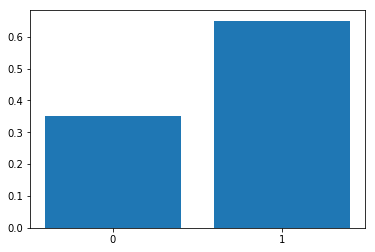

In [13]:
pyplot.bar(['0', '1'], [0.35, 0.65])

$$
\begin{align}
Expected\,Value: E[X] = p
\end{align}
$$

$$
\begin{align}
Variance: \sigma^2 = p(1 - p)
\end{align}
$$

$$
\begin{align}
Standard\,deviation: \sigma = \sqrt{p(1 - p)}
\end{align}
$$